In [1]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from bart_playground import Tree, Parameters
from bart_playground import Grow, Prune, Change, Swap
from bart_playground import Dataset
from bart_playground import visualize_tree 
from bart_playground import *  # Import the updated DataGenerator class

In [3]:
dgen = DataGenerator(n_samples=100, n_features=3, noise=0.1, random_seed=42)
X, y = dgen.generate(scenario="linear")

rng = np.random.default_rng(42)

In [4]:
def tearDown(filename):
    expected_filepath = f"{filename}.png"
    if os.path.exists(expected_filepath):
        os.remove(expected_filepath)

In [5]:
preprocessor = DefaultPreprocessor()
possible_thresholds=preprocessor.gen_thresholds(X=X)

In [6]:
tree1 = Tree.new(dataX=X)

In [7]:
trees = [tree1]
params = Parameters(trees, {"eps_sigma": 1.0})
params.trees

[Tree(vars=[-1 -2 -2 -2 -2 -2 -2 -2], thresholds=[nan nan nan nan nan nan nan nan], leaf_vals=[ 0. nan nan nan nan nan nan nan], n_vals=[100   0   0   0   0   0   0   0])]

# Grow

In [8]:
move = Grow(params, trees_changed=[0], possible_thresholds=possible_thresholds)
move.propose(rng)
trees = move.proposed.trees
trees

[Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.76202731        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23   0   0   0   0   0])]

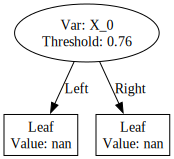

In [9]:
tree_g = move.proposed.trees[0]
filename1 = "tree_g"
visualize_tree(tree_g, filename=filename1, format="png")

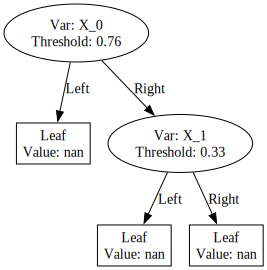

In [10]:
params = Parameters(trees, {"eps_sigma": 1.0})
move = Grow(params, trees_changed=[0], possible_thresholds=possible_thresholds)
move.propose(rng)
trees = move.proposed.trees
tree_gg = move.proposed.trees[0]
filename11 = "tree_gg"
visualize_tree(tree_gg, filename=filename11, format="png")

# Prune

In [11]:
params = Parameters(trees, {"eps_sigma": 1.0})

move = Prune(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.76202731        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23   0   0   0   0   0])]

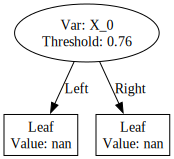

In [12]:
tree_p = move.proposed.trees[0]
filename2 = "tree_p"
visualize_tree(tree_p, filename=filename2, format="png")

# Change

In [13]:
params = Parameters(trees, {"eps_sigma": 1.0})

move = Change(params, trees_changed=[0], possible_thresholds=possible_thresholds)
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.54193754        nan 0.33203344        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  52  48   0   0  18  30   0])]

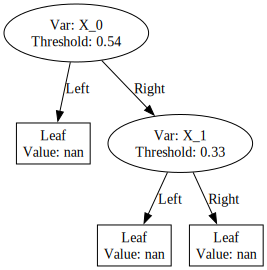

In [14]:
tree_c = move.proposed.trees[0]
filename3 = "tree_c"
visualize_tree(tree_c, filename=filename3, format="png")

# Swap

In [15]:
trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.76202731        nan 0.33203344        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23   0   0   9  14   0])]

In [16]:
params = Parameters(trees, {"eps_sigma": 1.0})

move = Swap(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 1 -1  0 -2 -2 -1 -1 -2], thresholds=[0.33203344        nan 0.76202731        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  43  57   0   0  43  14   0])]

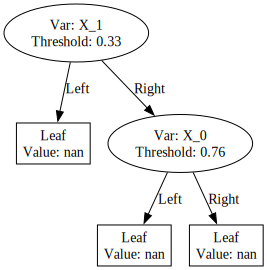

In [17]:
tree_s = move.proposed.trees[0]
filename4 = "tree_s"
visualize_tree(tree_s, filename=filename4, format="png")

In [18]:
tearDown(filename1)
tearDown(filename11)
tearDown(filename2)
tearDown(filename3)
tearDown(filename4)